## Objective of EDA

* What is the average length of the trip?
* Average number of rides per week or per month?
* Total tax savings based on traveled business miles?
* Percentage of business miles vs personal vs. Meals
* How much money can be saved by a typical customer using Uber, Careem, or Lyft versus regular cab service?

* Check how long do people travel with Uber?
* What Hour Do Most People Take Uber To Their Destination?
* Check The Purpose Of Trips
* Which Day Has The Highest Number Of Trips
* What Are The Number Of Trips Per Each Day?
* What Are The Trips In The Month
* The starting points of trips. Where Do People Start Boarding Their Trip From Most?


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Visualization library 
import matplotlib.pyplot as plt
import seaborn as sns

## Warning ignore
import warnings
warnings.filterwarnings("ignore") 

In [2]:
#24477f : Mck deep blue
#0892d0 : Mck electric blue
#66b3ff : light blue

mck_color2 = sns.color_palette(['#0892d0', '#24477f'])
mck_color = sns.blend_palette(['#0892d0', '#24477f','black'],9)
mck_color12 = sns.blend_palette(['#0892d0', '#24477f','black'],12)
mck_color25 = sns.blend_palette(['#41aad9','#0892d0', '#24477f','black'],25)
sns.color_palette('Blues')
sns.color_palette(mck_color)

[(0.03137254901960784, 0.5725490196078431, 0.8156862745098039),
 (0.05893118031526336, 0.4987312572087658, 0.7359630911188004),
 (0.08648981161091887, 0.42491349480968854, 0.656239907727797),
 (0.11404844290657438, 0.3510957324106113, 0.5765167243367936),
 (0.14062283737024223, 0.27733948481353327, 0.49608612072279895),
 (0.10519031141868512, 0.2074586697424068, 0.3710880430603614),
 (0.06975778546712803, 0.13757785467128028, 0.24608996539792388),
 (0.034325259515570944, 0.0676970396001538, 0.12109188773548635),
 (0.0, 0.0, 0.0)]

In [3]:
df= pd.read_csv('../input/uberdrives/My Uber Drives - 2016.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
## axis=1 indicates row
## by default axis = 0 which indicates feature/columns
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [5]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
df= df.head(-1)

In [7]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [8]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [9]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [10]:
df['START*'].nunique()

177

In [11]:
df['START*'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START*, Length: 177, dtype: int64

In [12]:
df['STOP*'].value_counts()

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP*, Length: 188, dtype: int64

In [13]:
df['STOP*'].nunique()

188

In [14]:
df[df['START*']!=df['STOP*']]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit
10,1/10/2016 15:08,1/10/2016 15:51,Business,New York,Queens,10.8,Meeting
...,...,...,...,...,...,...,...
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN
1144,12/29/2016 23:14,12/29/2016 23:47,Business,Unknown Location,Kar?chi,12.9,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [16]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format="%m/%d/%Y %H:%M")
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format="%m/%d/%Y %H:%M")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [18]:
df['START_DATE*']

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE*, Length: 1155, dtype: datetime64[ns]

### About calendar Module
Python defines an *inbuilt module calendar* that** handles operations related to the calendar**. 
The `calendar module allows output calendars like the program and provides additional useful functions related to the calendar`. Functions and classes defined in the Calendar module use an idealized calendar, the current Gregorian calendar extended indefinitely in both directions. `By default`, these calendars have `Monday as the first day of the week, and Sunday as the last`

**What is module?**  
Modules are ***simply files with the “.py” extension containing Python code that can be imported inside another Python Program.*** 
In simple terms, we can consider a module to be the same as a code library or a file that contains a set of functions that you want to include in your application.



In [19]:
### Since we want to find our day of week thus We are importing calendar
import calendar

In [20]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR']=hour
df['DAY']=day
df['DAY_OF_WEEK']=dayofweek
df['MONTH']=month
df['WEEKDAY']=weekday

In [21]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


In [22]:
df['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

## Q. What is Purpose of Trip

<AxesSubplot:xlabel='count', ylabel='PURPOSE*'>

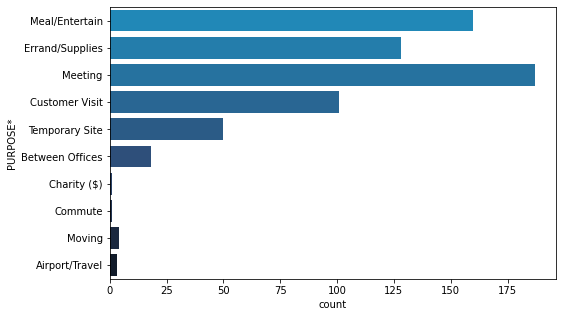

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['PURPOSE*'], palette= mck_color12)

<AxesSubplot:>

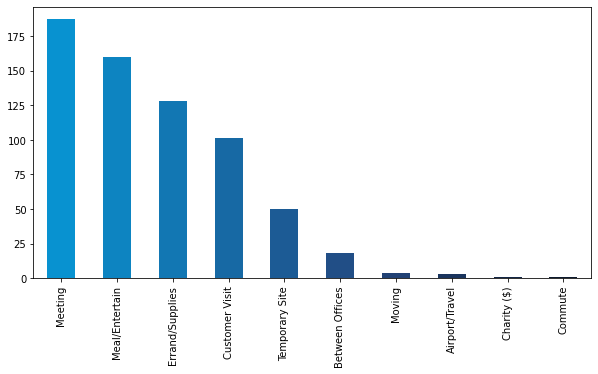

In [24]:
df['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color=mck_color12)

## Q. The starting points of trips. Where Do People Start Boarding Their Trip From Most?

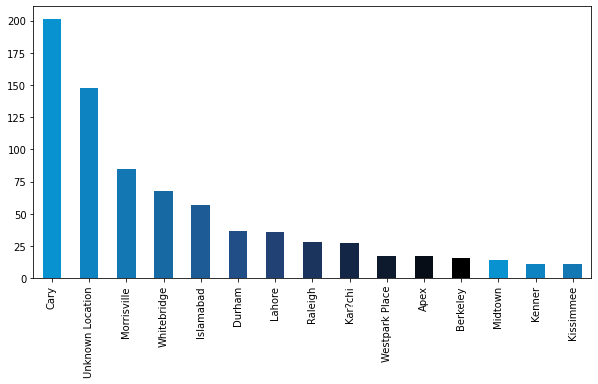

In [25]:
start_trip=df['START*'].value_counts().head(15)
start_trip.plot(kind='bar',figsize=(10,5),color=mck_color12);

## Q. What Hour Do Most People Take Uber To Their Destination?

14.696103896103896


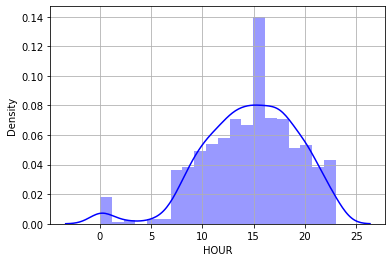

In [26]:
sns.distplot(df.HOUR, color='Blue', bins=20)
plt.grid(True)
print(df.HOUR.mean())

Text(0.5, 1.0, 'Number of trips Vs hours')

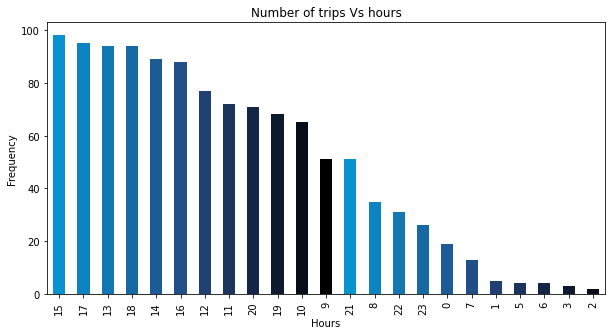

In [27]:
hours = df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color=mck_color12,figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

## Q. Which Day Has The Highest Number Of Trips

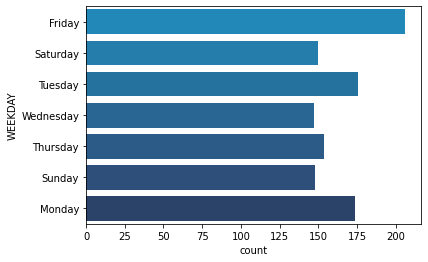

In [28]:
sns.countplot(y=df.WEEKDAY, palette=mck_color12);

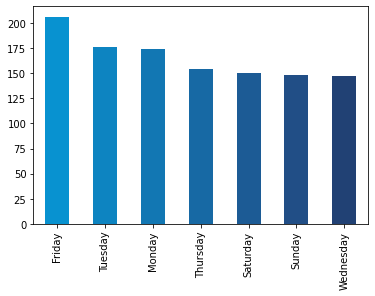

In [29]:
df.WEEKDAY.value_counts().plot(kind='bar', color= mck_color12);

## Q. What Are The Number Of Trips Per Each Day?

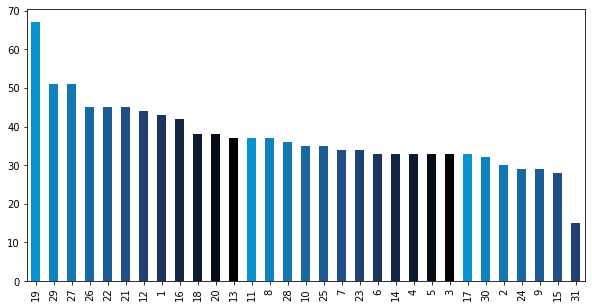

In [30]:
df.DAY.value_counts().plot(kind='bar', color= mck_color12,figsize=(10,5));

## Q. What Are The Trips In The Month?

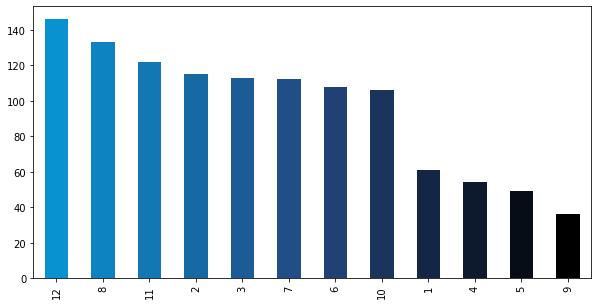

In [31]:
df.MONTH.value_counts().plot(kind='bar', color= mck_color12,figsize=(10,5));

## Q. What is the average length of the trip?

In [32]:
df['MILES*'].mean()

10.566839826839812

In [33]:
import plotly.express as px

In [34]:
fig = px.histogram(df, x='MILES*', marginal="rug",hover_data=df.columns)
fig.show()

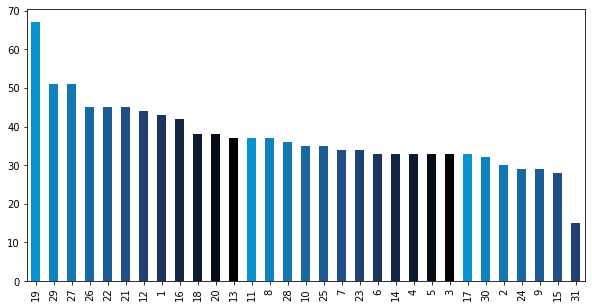

In [35]:
df.DAY.value_counts().plot(kind='bar', color= mck_color12,figsize=(10,5));

## Q. Average number of rides per week or per month?

In [36]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,5,12,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,5,12,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,5,12,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,5,12,Saturday


A Brief recap to group by
* groupby: An aggregated function **returns a single aggregated value for each group**. Once the group by object is created, several aggregation operations can be performed on the grouped data. 


In [37]:
df.groupby('MONTH')

In [38]:
x= df.groupby('MONTH')
print('len will return size of group i.e no of group ',len(x),'\n')
print('size() will return size of group i.e no of elements in each group ',x.size().sort_values(ascending=False))
x.first()
x.last()

len will return size of group i.e no of group  12 

size() will return size of group i.e no of elements in each group  MONTH
12    146
8     133
11    122
2     115
3     113
7     112
6     108
10    106
1      61
4      54
5      49
9      36
dtype: int64


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,WEEKDAY
MONTH,,,,,,,,,,,
1,2016-01-30 18:09:00,2016-01-30 18:24:00,Business,Apex,Cary,5.7,Customer Visit,18,30,5,Saturday
2,2016-02-29 16:40:00,2016-02-29 17:00:00,Business,Hazelwood,Whitebridge,6.6,Customer Visit,16,29,0,Monday
3,2016-03-31 14:37:00,2016-03-31 15:09:00,Business,Orlando,Kissimmee,16.4,Meal/Entertain,14,31,3,Thursday
4,2016-04-30 22:16:00,2016-04-30 22:34:00,Business,Waverly Place,Whitebridge,6.8,Meal/Entertain,22,30,5,Saturday
5,2016-05-31 17:50:00,2016-05-31 17:59:00,Business,Westpark Place,Whitebridge,1.8,Meeting,17,31,1,Tuesday
6,2016-06-30 20:09:00,2016-06-30 20:26:00,Business,Cary,Durham,9.9,Meeting,20,30,3,Thursday
7,2016-07-31 17:30:00,2016-07-31 17:37:00,Business,Westpark Place,Whitebridge,1.8,Meal/Entertain,17,31,6,Sunday
8,2016-08-30 17:27:00,2016-08-30 18:09:00,Business,Unknown Location,Unknown Location,13.0,Temporary Site,17,30,1,Tuesday
9,2016-09-30 20:59:00,2016-09-30 22:34:00,Business,Islamabad,Unknown Location,16.7,None,20,30,4,Friday


In [39]:
x.get_group(1)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,2,5,1,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016-01-29 13:24:00,2016-01-29 13:47:00,Business,Durham,Cary,10.1,Meeting,13,29,4,1,Friday
57,2016-01-29 18:31:00,2016-01-29 18:52:00,Business,Cary,Apex,5.8,Errand/Supplies,18,29,4,1,Friday
58,2016-01-29 21:21:00,2016-01-29 21:40:00,Business,Apex,Cary,5.5,Meal/Entertain,21,29,4,1,Friday
59,2016-01-30 16:21:00,2016-01-30 16:33:00,Business,Cary,Apex,5.7,Errand/Supplies,16,30,5,1,Saturday


In [40]:
x.sum()

,MILES*,HOUR,DAY,DAY_OF_WEEK
MONTH,,,,
1,512.9,828,1080,157
2,908.2,1588,1811,387
3,1693.9,1654,1753,374
4,1113.0,767,807,199
5,363.8,777,661,136
6,842.8,1638,1764,304
7,1224.6,1611,1708,329
8,1335.5,1936,2309,300
9,601.8,527,593,84


# Conclusion